In [47]:

for key in data[3]:
    print("datapoints", key, len(data[3][key]))

datapoints mood 221
datapoints circumplex.arousal 222
datapoints circumplex.valence 222
datapoints activity 1122
datapoints screen 4401
datapoints call 223
datapoints sms 59
datapoints appCat.builtin 903
datapoints appCat.communication 2848
datapoints appCat.entertainment 3387
datapoints appCat.finance 72
datapoints appCat.office 102
datapoints appCat.other 494
datapoints appCat.social 18
datapoints appCat.travel 51
datapoints appCat.unknown 46
datapoints appCat.utilities 31
datapoints appCat.weather 3


In [11]:
# data cleaning
import numpy as np 
import pandas as pd
import scipy
from scipy.stats import zscore
import seaborn as sns

dataset = "dataset_mood_smartphone.csv" 
df = pd.read_csv(dataset) # dataframe in pandas
df_screen = df[df["variable"]=="screen"]
df.head()


,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.0
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.0
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.0
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.0
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.0


In [7]:
df_act = df[df["variable"]=="activity"]
df_act[df_act["id"]=="AS14.01"]


,Unnamed: 0,id,time,variable,value
16927,16928,AS14.01,2014-03-20 22:00:00.000,activity,0.071429
16928,16929,AS14.01,2014-03-20 23:00:00.000,activity,0.091667
16929,16930,AS14.01,2014-03-21 00:00:00.000,activity,0.008333
16930,16931,AS14.01,2014-03-21 01:00:00.000,activity,0.000000
16931,16932,AS14.01,2014-03-21 02:00:00.000,activity,0.000000
...,...,...,...,...,...
17978,17979,AS14.01,2014-05-05 06:00:00.000,activity,0.000000
17979,17980,AS14.01,2014-05-05 07:00:00.000,activity,0.000000
17980,17981,AS14.01,2014-05-05 08:00:00.000,activity,0.000000
17981,17982,AS14.01,2014-05-05 09:00:00.000,activity,0.010638


In [21]:
df_screen = df[df["variable"]=="screen"]  # describe statistics
df_screen.describe()
print(df_screen)

        Unnamed: 0       id                     time variable    value
39892      39893.0  AS14.01  2014-03-20 23:14:58.200   screen   58.846
39893      39894.0  AS14.01  2014-03-20 23:17:23.092   screen    9.217
39894      39895.0  AS14.01  2014-03-20 23:20:43.698   screen   19.829
39895      39896.0  AS14.01  2014-03-20 23:22:05.476   screen  483.510
39897      39898.0  AS14.01  2014-03-20 23:45:31.217   screen   25.123
...            ...      ...                      ...      ...      ...
136464    136465.0  AS14.33  2014-05-30 21:28:20.486   screen   12.709
136465    136466.0  AS14.33  2014-05-30 21:34:32.516   screen  133.394
136466    136467.0  AS14.33  2014-05-30 21:38:25.263   screen  164.072
136467    136468.0  AS14.33  2014-05-30 21:47:30.344   screen  504.017
136468    136469.0  AS14.33  2014-05-30 21:58:51.355   screen  526.137

[95309 rows x 5 columns]


<AxesSubplot:xlabel='value'>

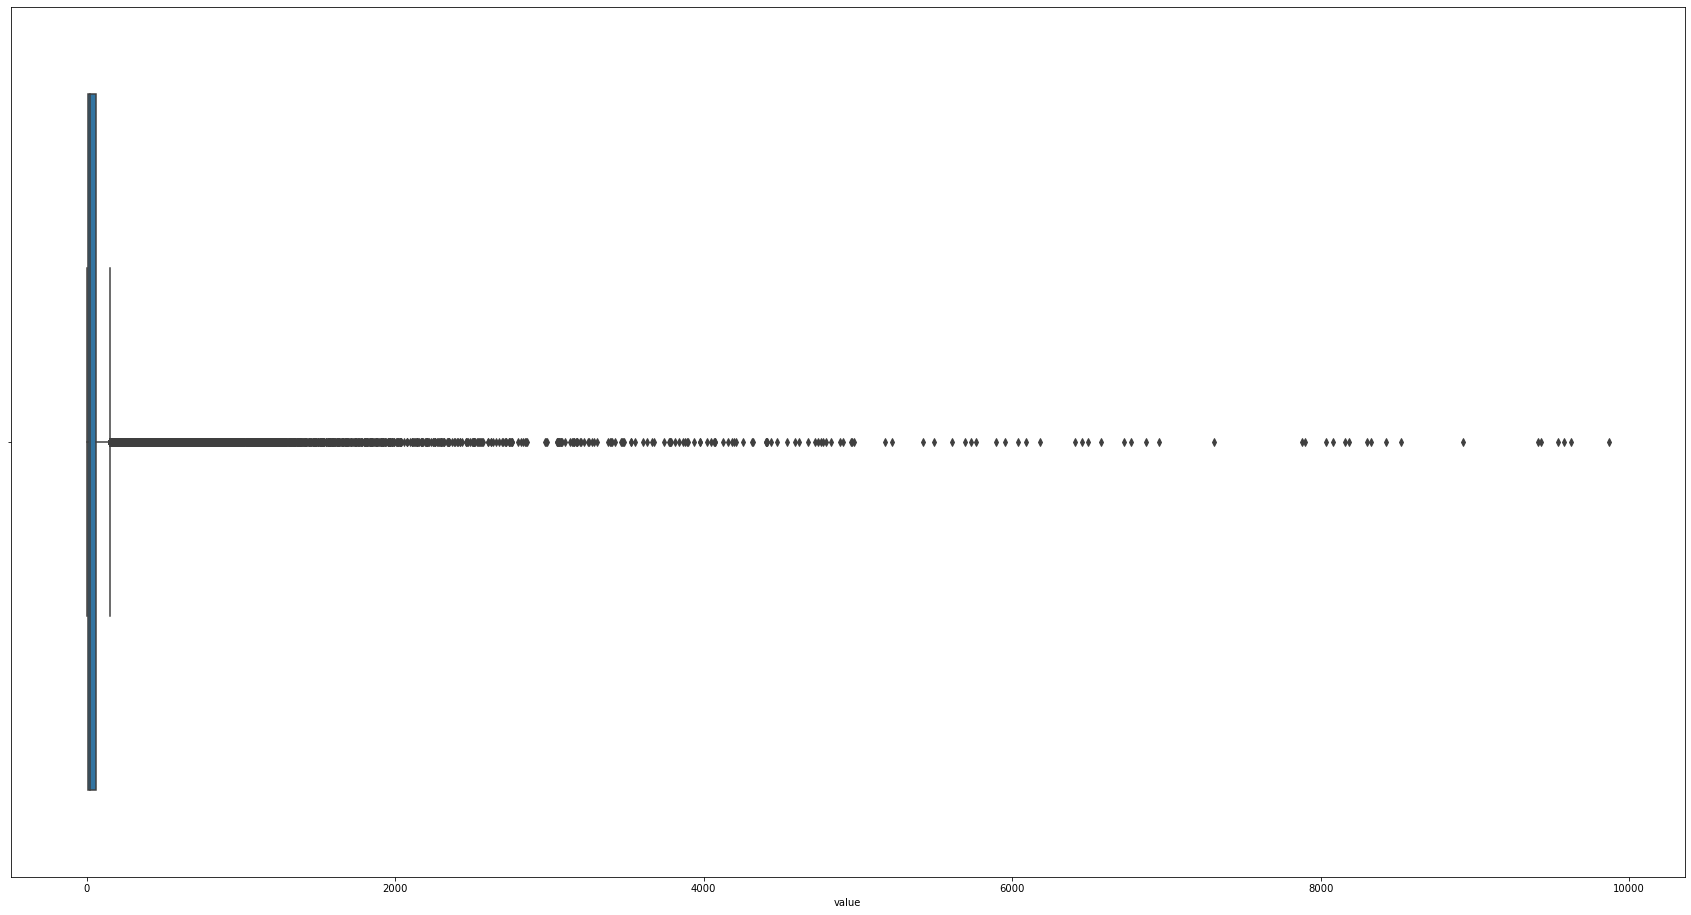

In [4]:
# boxplot of data
import matplotlib.pyplot as plt
plt.figure(figsize=(30,16))
sns.boxplot(data=df_screen, x='value')
### data doesn't look normal, so we probably need a ranked correlation test 

In [2]:
def filter_outliers(df, category):
    "filters outliers and plots histograms"
    df_cat = df[df["variable"]==category]  # describe statistics
    df_cat = df_cat[df_cat["value"] < df_screen["value"].std()*3]  # filter outliers for screen 3 stdev 
    df[df["variable"]==category] = df_cat  # replace in dataframe
    df_cat.hist()
    return df



In [ ]:
"""When normalising inputs to a Neural net, you want the numbers to be in a similar range
across different inputs, so inputs which tend to have much larger absolute values don't dwarf the 
contributions from smaller ones. You need to preserve the Y values (frequencies) but can change the X 
scale with various transforms (potentially non-linear ones).
Here you want to "squash" the distribution along the x axis, so the larger X values are "squashed" more,
and so the range of X is of the same order of magnitude as the other inputs, without destroying the frequency information.
Taking a log (base 2 or 10) of X is the obvious way to do that. If you use log10 your data will range from 0->2.4 or so.
You can get away with this in your distribution because the lowest value is 1. It's trickier if your min value is zero or 
close to zero.
You may then want to do a further normalisation of subtracting the mean, and dividing by the standard deviation, so 
the variance is 1 - the most common "standard" nn normalisation technique."""

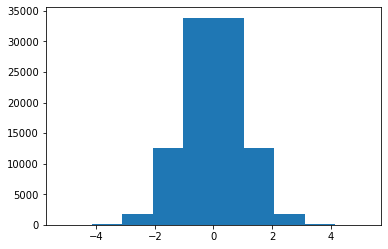

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

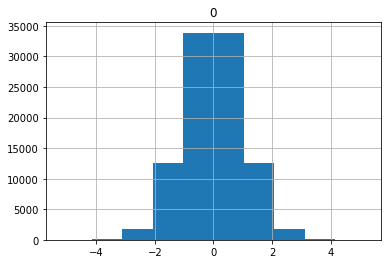

In [33]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, normalize, QuantileTransformer
import matplotlib.pyplot as plt
pt = QuantileTransformer(output_distribution='normal')  # transform to normal distribution
x = df_screen["value"].values

#after = pt.fit_transform(x)
#after = np.log(after)
#after = normalize(x, norm='l2')
afterdf = pt.fit_transform(x.reshape(-1, 1))
plt.hist(afterdf)
plt.show()
df2 = pd.DataFrame(afterdf)
df2.hist()

In [7]:
from sklearn.preprocessing import QuantileTransformer

def normalize_data(df, category):

    #df = pd.read_csv(dataset) # dataframe in pandas

    pt = QuantileTransformer(output_distribution='normal')  # transform to normal distribution
    df_cat = df[df["variable"]==category]
    x = df_cat["value"].values  # get the values 
    normdf = np.squeeze(pt.fit_transform(x.reshape(-1, 1)).T) #transform 
    df_catn = df_cat.to_numpy() # transform into numpy
    df_catn[:,4] = normdf  # replace column
    df_update = pd.DataFrame(data=df_catn, index=df[df["variable"]==category].index.values.tolist(), columns=df.columns)# create new df

    df_new = df_update.combine_first(df)  #.reset_index(level=1, drop=True).astype(int).reset_index()

    df_new['value'] = df_new['value'].fillna(0)  # delete NA values ??
    df_new['value'].astype(float) # change dt object (from numpy), to float
    #df_new[df_new["variable"]==category].hist() # show histogram of normalized data
    return(df_new)

df = normalize_data(df, "screen")
print("first done")
print(df[df["variable"]=="screen"])

df = normalize_data(df, "appCat.builtin")
df = normalize_data(df, "appCat.communication")
df = normalize_data(df, "appCat.entertainment")
df = normalize_data(df, "appCat.office")
df = normalize_data(df, "appCat.other")
df = normalize_data(df, "appCat.social")
df = normalize_data(df, "appCat.travel")
df = normalize_data(df, "appCat.unknown")
df = normalize_data(df, "appCat.utilities")
df = normalize_data(df, "appCat.weather")


first done
       Unnamed: 0       id                     time variable     value
39892       39893  AS14.01  2014-03-20 23:14:58.200   screen  0.627201
39893       39894  AS14.01  2014-03-20 23:17:23.092   screen -0.481544
39894       39895  AS14.01  2014-03-20 23:20:43.698   screen -0.008381
39895       39896  AS14.01  2014-03-20 23:22:05.476   screen  1.964668
39896       39897  AS14.01  2014-03-20 23:31:08.088   screen  2.258427
...           ...      ...                      ...      ...       ...
136465     136466  AS14.33  2014-05-30 21:34:32.516   screen  1.191570
136466     136467  AS14.33  2014-05-30 21:38:25.263   screen  1.324900
136467     136468  AS14.33  2014-05-30 21:47:30.344   screen  1.990797
136468     136469  AS14.33  2014-05-30 21:58:51.355   screen  2.013272
136469     136470  AS14.33  2014-05-30 22:18:11.591   screen  2.285727

[96578 rows x 5 columns]


C:\Users\marti\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (939). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "
C:\Users\marti\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (255). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


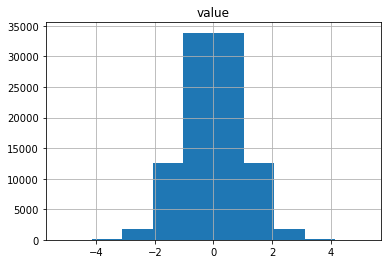

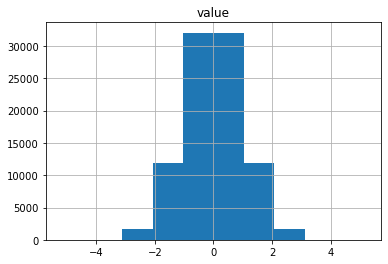

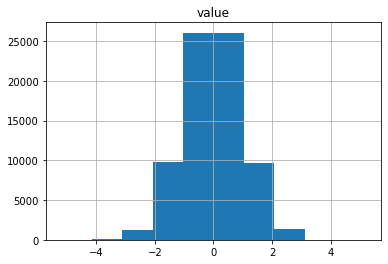

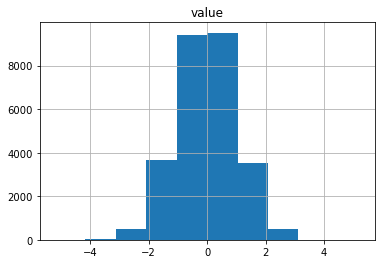

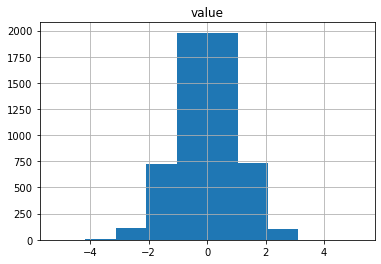

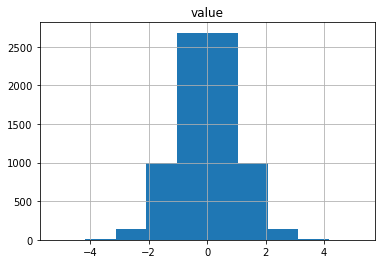

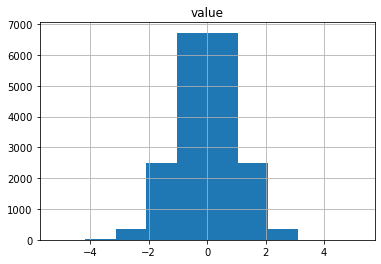

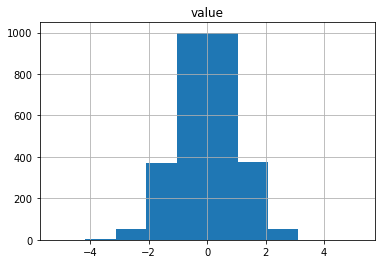

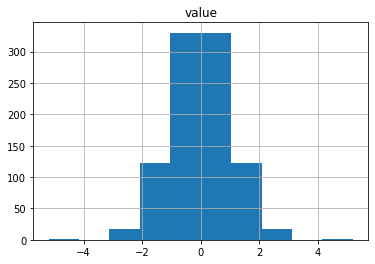

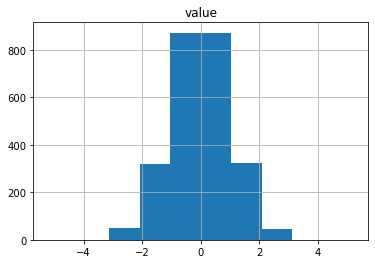

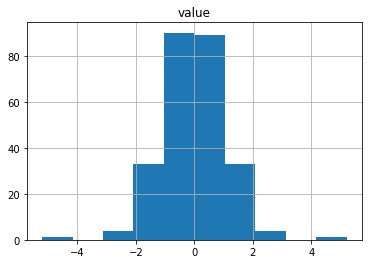

In [8]:
df = filter_outliers(df, "screen")
df = filter_outliers(df, "appCat.builtin")
df = filter_outliers(df, "appCat.communication")
df = filter_outliers(df, "appCat.entertainment")
df = filter_outliers(df, "appCat.office")
df = filter_outliers(df, "appCat.other")
df = filter_outliers(df, "appCat.social")
df = filter_outliers(df, "appCat.travel")
df = filter_outliers(df, "appCat.unknown")
df = filter_outliers(df, "appCat.utilities")
df = filter_outliers(df, "appCat.weather")